# Multivariate Linear Regression From Scratch
### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Data Preprocessing

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96df32b280>,
      dtype=object)

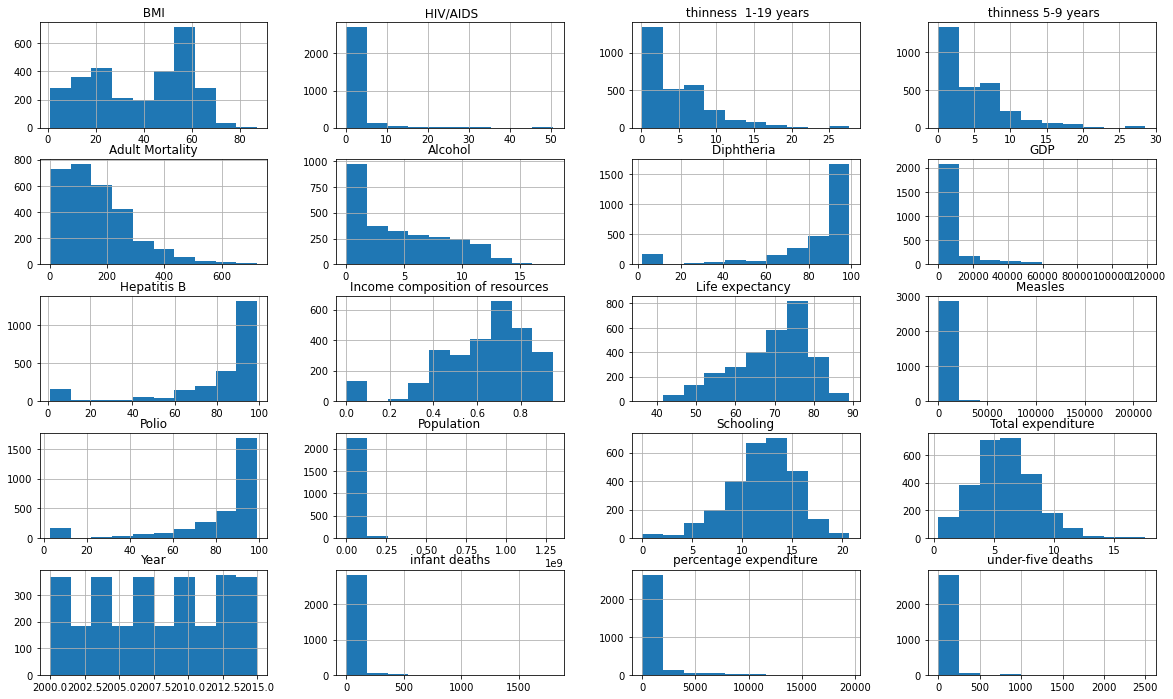

In [5]:
df.hist(figsize=(20,12))

In [6]:
def fix_missing(df, col, name):
    if pd.api.types.is_numeric_dtype(col):
        if pd.isnull(col).sum():
            df[name] = col.fillna(col.median())

for n,c in df.items(): 
    fix_missing(df, c, n)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [8]:
df.to_csv("preprocess.csv", index=False)

In [9]:
from sklearn.preprocessing import StandardScaler

def numericalize(df, col, name, max_n_cat):
    if not pd.api.types.is_numeric_dtype(col) and ( max_n_cat is None or col.nunique() > max_n_cat):
        df[name] = pd.Categorical(col).codes+1

def scale_vars(df, mapper=None):
    if mapper is None:
        map_df = df[[n for n in df.columns if pd.api.types.is_numeric_dtype(df[n])]]
        mapper = StandardScaler().fit(map_df)
    df[map_df.columns] = mapper.transform(map_df)
    return mapper

In [10]:
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

In [11]:
mapper = scale_vars(X)
for n,c in X.items(): 
    numericalize(X, c, n, 7)
X = pd.get_dummies(X, drop_first=True)

In [12]:
X.head()

,Country,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,1,1.621762,0.792119,0.268824,-1.156989,-0.335570,-0.783807,-0.110384,-0.967349,0.255359,...,0.931485,-0.735391,-0.323445,-0.453371,0.435183,2.815209,2.775386,-0.737973,-0.585017,1
1,1,1.404986,0.856601,0.285786,-1.156989,-0.334441,-0.914281,-0.168124,-0.992434,0.274060,...,0.939818,-0.862233,-0.323445,-0.451232,-0.183349,2.883439,2.819978,-0.752600,-0.615649,1
2,1,1.188210,0.832421,0.302749,-1.156989,-0.334594,-0.827298,-0.173531,-1.017519,0.292761,...,0.918987,-0.777671,-0.323445,-0.449799,0.398066,2.928926,2.864570,-0.781853,-0.646281,1
3,1,0.971434,0.864662,0.328193,-1.156989,-0.332096,-0.696824,0.032045,-1.042605,0.317696,...,1.081463,-0.650830,-0.323445,-0.446924,-0.120968,2.974413,2.931458,-0.815982,-0.676912,1
4,1,0.754658,0.888843,0.345155,-1.156989,-0.367862,-0.653333,0.051757,-1.062673,0.342631,...,0.810670,-0.608549,-0.323445,-0.492539,-0.134268,3.042643,2.976051,-0.859862,-0.768808,1


In [13]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy , dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Implementation From Scratch
### Multivariate Regression

Let **Y** be the n x p predicton matrix(Dependent Variable matrix), **X** be an n x (q + 1) matrix such that it contains all entries of the first column are 1′s, and other columns are independent variables. Let **B** be an (q + 1) x p matrix of fixed parameters. The model is:
\begin{equation}
Y = X \cdot B
\end{equation}

Estimation of Y:
\begin{equation}
\hat{Y} = X \cdot \hat{B}
\end{equation}

$\hat{Y}$ is the predicted value that all lie on the regression hyper-plane. Then  the residuals $Y - \hat{Y}$ are orthogonal to the columns of **X** and thus
\begin{equation}
X'\cdot (Y - X \cdot \hat{B}) = 0 \\
X'\cdot Y - X' \cdot X \cdot \hat{B} = 0 \\
X' \cdot X \cdot \hat{B} = X'\cdot Y 
\end{equation}
Hence,
\begin{equation}
\hat{B} = (X' \cdot X)^{-1} \cdot X'\cdot Y
\end{equation}

The least squares estimator $\hat{B}$ is the standardized coefficient estimate, which means we need to scale the predictors **X** (make them unit less) to make slope estimates comparable.These dimensionless regression coefficients are usually called standardized regression coefficients 

In [71]:
class MultivariateRegression:
    def __init__(self):
        self.coefs = []
        
    def fit(self, X, y):
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        
        ones = np.ones(X.shape[0]).reshape(-1,1)
        X = np.append(ones, X, axis=1)
        
        self.coefs = np.linalg.inv(X.T.dot(X)).dot(X.transpose()).dot(y)
    
    def predict(self, X_test):
        ones = np.ones(X_test.shape[0]).reshape(-1,1)
        X_test = np.append(ones, X_test, axis=1)
        y_pred = np.matmul(X_test, self.coefs)
        return y_pred
    
    def r_squared(self, y_pred, y_true):
        y_mean = np.mean(y_true)
        sse = np.sum((y_true - y_pred)**2)
        sst = np.sum((y_true - y_mean)**2)
        r_sqr = 1 - (sse / sst)
        return r_sqr
        
    def rmse(self, y_pred, y_test): 
        return np.sqrt(((y_pred - y_test)**2).mean())
    

In [72]:
## Model
regressor = MultivariateRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [73]:
print("RMSE: ",regressor.rmse(y_pred, y_test))
print("R^2: ", regressor.r_squared(y_pred, y_test))

RMSE:  4.172912112111349
R^2:  0.8247336798296087


### Scikit-learn Implementation

In [74]:
## Model
model = LinearRegression()
model.fit(X_train, y_train)
sk_y_pred = model.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error, r2_score

print("RMSE: ", mean_squared_error(sk_y_pred, y_test, squared=False))
print("R^2: ", r2_score(y_test, sk_y_pred))

RMSE:  4.172912112111337
R^2:  0.8247336798296097


### Comparison

* Both have Same RMSE and R squared